## Outline

1. **Motivation**
  - Why do we need to study RegEx?
  - What kind of tasks we can perform using RegEx?
  - **Business Case-1 Intro**: Extract customer info, mask email and phone 
number
    - How does the data look like? 
    - Email masking - corner cases
    - Email validation
    - **RegEx solution for email validation** - looks daunting, only an e.g to  motivate ReGex discussion 
 - So, what is a Regular Expression?

2. **But do we read/write these long complicated REs?**
   - How to find exact literals?
      - Find all occurences of "abc"
      - Will RE "bca" be able to find "abc"? - order matters
      - How to find all dots (.) in text - to motivate discussion about Metacharacters
      - But why it **doesn't matches for dot (.) when we use RE `.`**? - use `\.` as dot is a Metacharacter

  - But what are **Metacharacters**?
    - Explain metacharacters and glance through a list of metacharacters
    - How to find digits (and non digits)? - `\d`, `\D`
    - How to look for word (and non-word) characters? - `\w`, `\W`
    - How do we look for search for things like newline, tab etc? - `\s`, `\S`

  - What are **Anchors**?
    - How are they different from Metacharacters?
    - Word boundary (and non-boundary) anchors - `\b`, `\B`
    - Two very important anchors - `^`, `$`
    - Exercise - **Parse phone numbers from the text**
      - Discuss basic solution - `\d\d\d.\d\d\d.\d\d\d\d` - corner cases?
      - Can we be more specific?  - `\d\d\d[.-]\d\d\d[.-]\d\d\d\d` - to motivate character set

 - What is a **Character Set**? 
    - Explain range notation - `[a-z]`, `[A-Z]`
    - What if I want numbers from 1 to 6 - `[1-6]`
    - Explain negation - `[^a-z]`
    - Can we match more than one characters at a time? - use Quantifiers

 - What are **Quantifiers**?
    - Explain *, +, ?, {3}, {3, 4}
    - Redo phone parsing with quantifiers - `\d{3}[.-]\d{3}[-.]\d{4}`
    - Exercise - **Parse names starting from Mr**
    - Lets add **Mrs and Ms** to our search pattern - to motivate groups
  - What are **Groups**?
      - Explain `()` and `|`
      - Update solution for search Mr, Mrs, Ms - `M(r|s|rs)\.?\s[A-Z]\w*` 

- (Back to) **RegEx based Email Validation**
  - Would you now be able to understand other REs?
  - Explain the long RE by parts - `^\w+([\.-]?\w+)*@\w+([\.-]?\w+)*(\.\w{2,3})+$`

- **`re` library and important functions**
    - Important search functions - match, search, findall, finditer
    - Use `re` functions to find the patterns in the data 
      - **Extract phone numbers, emails and names**  from the data
    - `re.compile()`
    - Modifying Regular Expression with **flags** - re.IGNORECASE, re.VERBOSE
    - Can we extract different parts of the email in the re.match object? - `group(x)` method
    - **Business Case-1 Solution** - Parse and Mask email and phone numbers using re functions
    - Exercise: Extract location and pincode

- **Business Case-2: Extract data from pdf invoice**
  - pdf extracter library
  - Extract invoice number
  - Extract amounts - use `\$` instead of `$`

- **Apply RegEx on Pandas Dataframe**
  - Replace @ with [at] in the column emails - introduce `re.sub()` function
  - Change the date format - use `group()` feature to extract parts and `join()`

- **Exercise: Strong Password Detector**

  



## Motivation

- Today, we will learn about Regular Expressions
- They are also called RegEx in short

### Why do we need to study?
- Comes very handy if you are doing Text Processing, Text Analystics, or NLP
- Helpful in searching, parsing and manipulating textual data
- Pre-requisite for Data Science projects involving text mining.


To better understand this, lets answer a question


### What kind of tasks can we do using RegEx?

1. **Check if a string follows the pattern**

- Is this string a valid email address?
- Does the chosen password follows the guidelines?
- Has the user entered a valid phone number?

  Basically, tasks at the server side to validate the format of multiple user-entries 

2. **Find a pattern anywhere in the string**

- Parse all the phone numbers from a text file
- Mask the middle numbers of the phone number

  In general, we can think of any task which involves parsing, finding, replacing and deleting certain content from text data

Lets take a motivating example before I formally define Regular Expressions

### Business Case-1: Extract customer information and mask email and phone number

Mask personal information in email and phone numbers

Now where this masking can be useful?
- If you are performing any transaction, an OTP is generated
- The webpage notifies you that they have sent the OTP to +91-XXX-XXX-7410.
- Or they say that they have sent the OTP to aXXXt@gmail.com

Link:https://drive.google.com/file/d/1sSDV5UspYZL3UUOGuiuxppSGcv1wS9ex/view?usp=sharing


In [1]:
!gdown 1sSDV5UspYZL3UUOGuiuxppSGcv1wS9ex

Downloading...
From: https://drive.google.com/uc?id=1sSDV5UspYZL3UUOGuiuxppSGcv1wS9ex
To: /Users/dhruv/Desktop/regex/data.txt
100%|██████████████████████████████████████| 9.33k/9.33k [00:00<00:00, 10.9MB/s]


Lets read the text file 

In [2]:
data = open("data.txt", "r").read()
print(data[:500]) # display some data

Dave Martin
615-555-7164
173 Main St., Springfield RI 55924
davemartin@bogusemail.com

Charles Harris
800-555-5669
969 High St., Atlantis VA 34075
charlesharris@bogusemail.com

Eric Williams
560-555-5153
806 1st St., Faketown AK 86847
laurawilliams@bogusemail.com

Corey Jefferson
900-555-9340
826 Elm St., Epicburg NE 10671
coreyjefferson@bogusemail.com

Jennifer Martin-White
714-555-7405
212 Cedar St., Sunnydale CT 74983
jenniferwhite@bogusemail.com

Erick Davis
800-555-6771
519 Washington St., 


Hmmm, so, since are multiple information available in the text, we will have to first "parse" the info and then "mask" it.

#### Any suggestions how you will perform masking on emails?

#### Solution-1: Using String formatting

In [3]:
def mask_email(s):
  if "@" in s:
    name, domain = s.split("@")
    return f"{name[0]}####{name[-1]}@{domain}"

In [4]:
mask_email("abcd@efgh.com")

'a####d@efgh.com'

#### What do you think it will return if email string doesn't contain @?

In [5]:
mask_email("abcd.com")

#### Can you think of any other boundary case when this solution won't work?

In [6]:
mask_email("a@efgh.com") # name is single character

'a####a@efgh.com'

In [7]:
mask_email("abcd@efgh") # another invalid email add

'a####d@efgh'

#### If we can check if the provided email is valid, then the above function does the task

Now, you basically have to check the validity of the email when first time, the user provides the email


#### How can we check if an email address is valid?

- There are a bunch of rules provided by the World Wide Web Consortium (WWWC).
- Even if we have those rules, we will have to write a big if-elif-else based solution, right?


#### RegEx solution

Lets see how this problem can be solved using regular expressions




In [8]:
import re # import regex library

def is_vemail(s):
  email_pattern = "^\w+([\.-]?\w+)*@\w+([\.-]?\w+)*(\.\w{2,3})+$"
  res = re.search(email_pattern, s)
  # scans through string looking for the first location where pattern is found - will discuss about re module later
  if res:
    return True
  else:
    return False

In [9]:
is_vemail("ai.with.anant@gmail.com")

True

In [10]:
is_vemail("abcd@efgh")

False

In [11]:
is_vemail("a@efgh.com")

True

In [12]:
is_vemail("anant.mittal@iiit.ac.in") # multiple dots

True

In [13]:
is_vemail("anant.mittal@umd.edu") # other domain

True

- The string `^\w+([\.-]?\w+)*@\w+([\.-]?\w+)*(\.\w{2,3})+$` is called a Regular Expression
- In the first, this **looks pretty daunting**, but this is because you can do so much with them
- As we get to know more about Regular Expressions, it will be easier to understand this


### So, what is a Regular Expression (RegEx)?




- RegEx can be thought of as a **tiny highly specialised programming language**
-  which can be **used to find the patterns in the strings**
- What does it have? Using some set of characters and symbols, you **can write rules for the possible strings** you want to match.


But the big question is

#### How to write these regular expressions?

- Rules for writing REs are programming language agnostic, its a seperate language itself
- You can use use the same REs in other programming langiages and even in terminal
- **First, we need to need to learn how to write RE for a particular pattern**
- **Later, we  will come back to check out some handy Python functions** 
- These Python functions use REs that we write to perform search, parse, split and replace.

We can use a simple online tool to learn RegEx


https://regexr.com/


Lets use the following text to find some patterns, lets paste in the tool


abcdefghijklmnopqurtuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ
1234567890

abcdef

.[{()\^$|?*+

scaler.com

321-555-4321
123.555.1234

Mr. Varma
Mr Anant
Ms Nandini
Mrs. Singh
Mr. T


Lets work on finding some simple patterns in this textual content

#### Lets look for "abc"

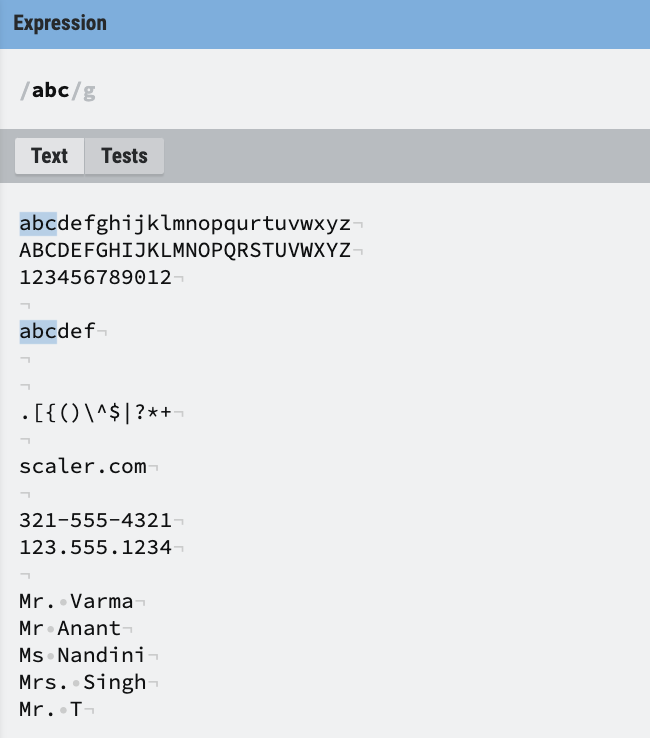

- Pretty, easy and neat, it highlights the text which matches the pattern "abc"
- Notice that, **it couldn't find "ABC"**, that means, **it is case sensitive**.

As of now, this looks for the exact same string literal "abc"

#### Can it find the same string if we jumble up the chars in RE?

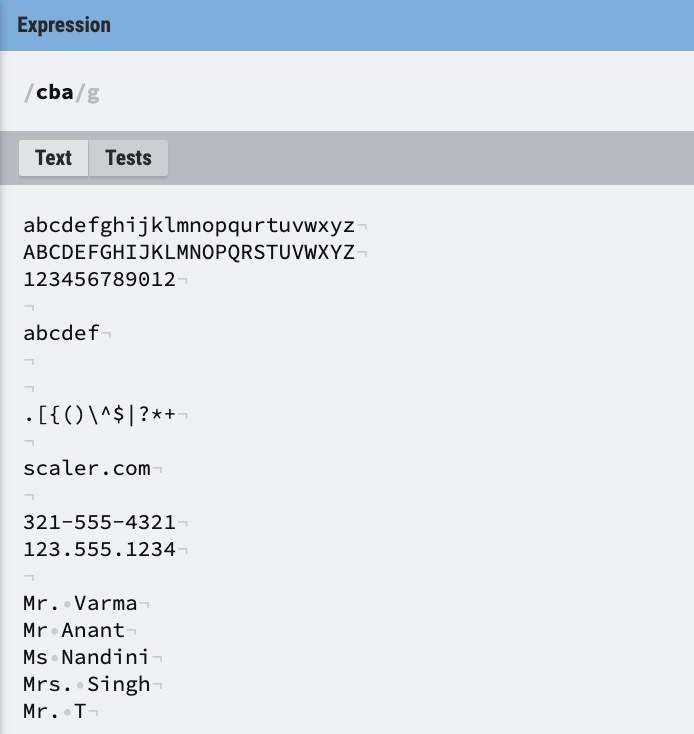

No, it couldn't, which means, **order matters**

Lets do something similar

#### Lets look for exact string literal "." dot




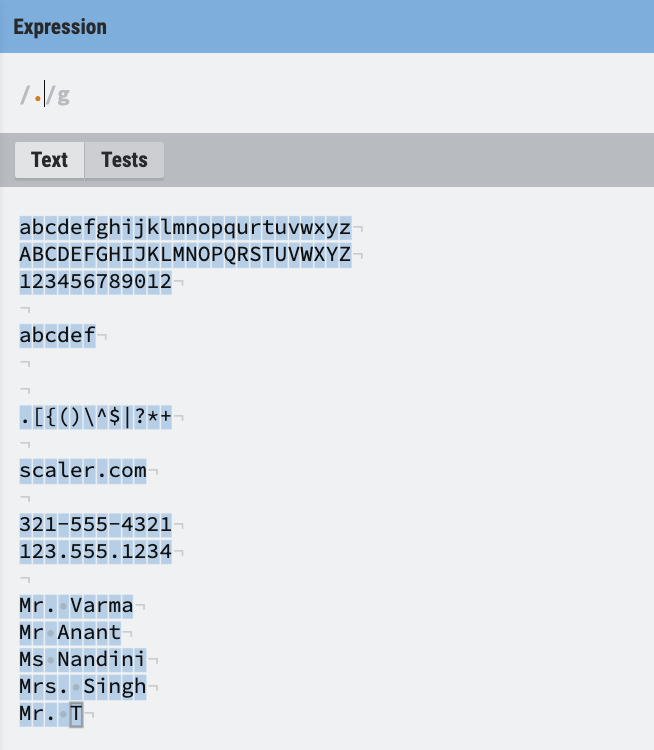

WOAAAH, suprinsingly, it highlights EVERYTHING except newline.

##### But what could this mean?

Well, probably, dot has a special meaning in REs (not imp what it is right now)

Lets try to use escape character (backslash) along with dot.




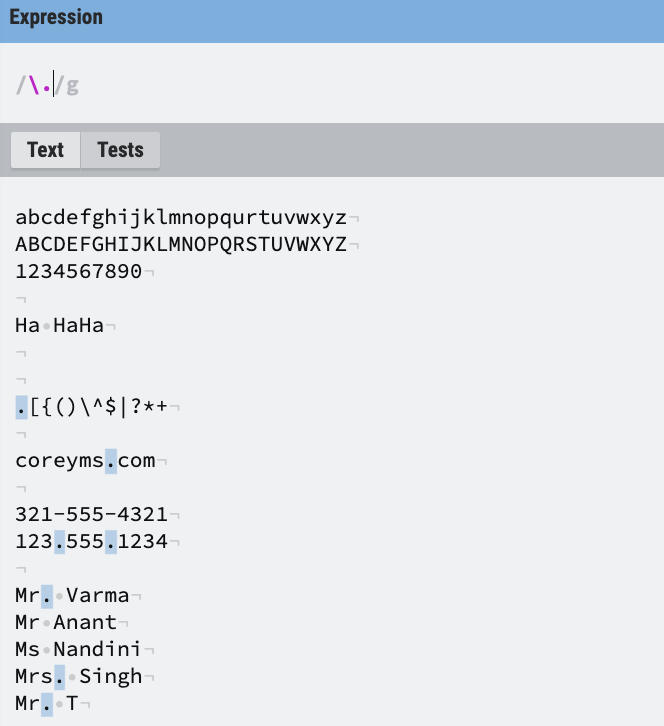

Phew, now we are able to find dots in the text content.

But this brings our discussion to these special characters called **Metacharacters**

### What are Metacharacters?

-  **Special characters that don’t match themselves**
- Instead, they signal, some out-of-ordinary thing should be matched.
- Infact, the 8th line in the text contains list of all metacharacters
- `.[{()\^$|?*+`
- Notice that backslash is also a meta-character, so to look for literal `\`, we need to use `\\`


so, we are looking for `scaler.com`, we need to type `scaler\.com`


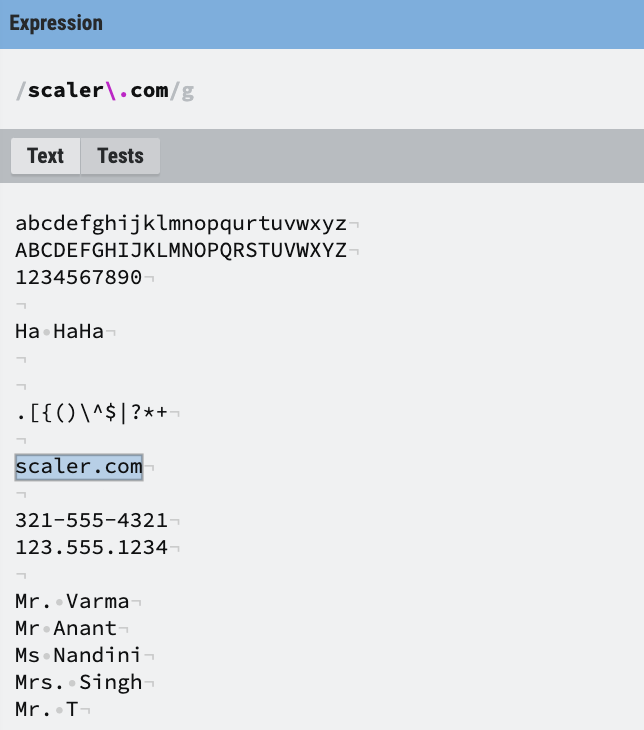

But finding literals is not fun, we need to search for patterns, for which we will use these metacharacters

```
.       - Any Character Except New Line
\d      - Digit (0-9)
\D      - Not a Digit (0-9)
\w      - Word Character (a-z, A-Z, 0-9, _)
\W      - Not a Word Character
\s      - Whitespace (space, tab, newline)
\S      - Not Whitespace (space, tab, newline)

\b      - Word Boundary
\B      - Not a Word Boundary
^       - Beginning of a String
$       - End of a String

[]      - Matches Characters in brackets
[^ ]    - Matches Characters NOT in brackets
|       - Either Or
( )     - Group
```

- We don't need to remember right now
- As we practice, we will get to remember most of them
- If not, we can go to the Python documentation and look search for it

https://docs.python.org/3/howto/regex.html

Lets see them one by one

First one is dot (.) and we have already seen this - matches everything except newline


#### Lets see `\d`




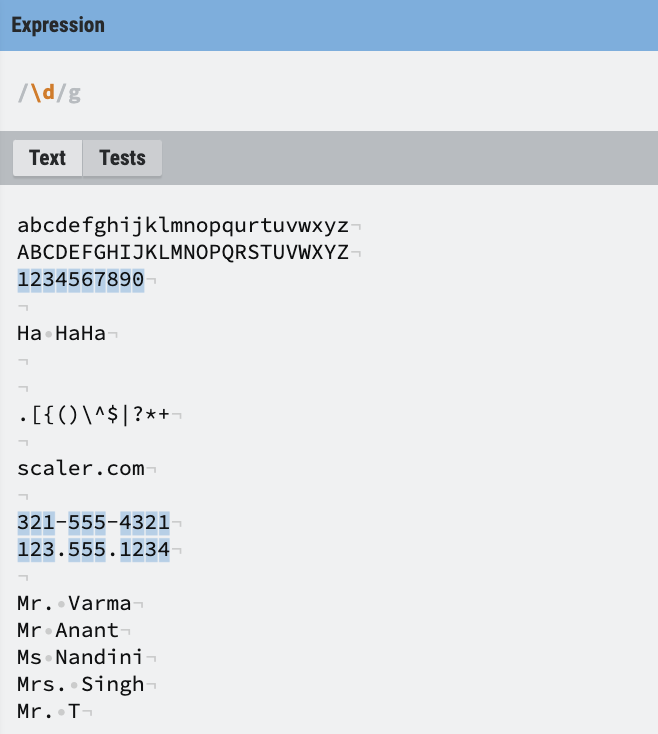

As we can see, this looks for all the digits

But there is a capital version of "\d" in the list as well

#### Lets try `\D`



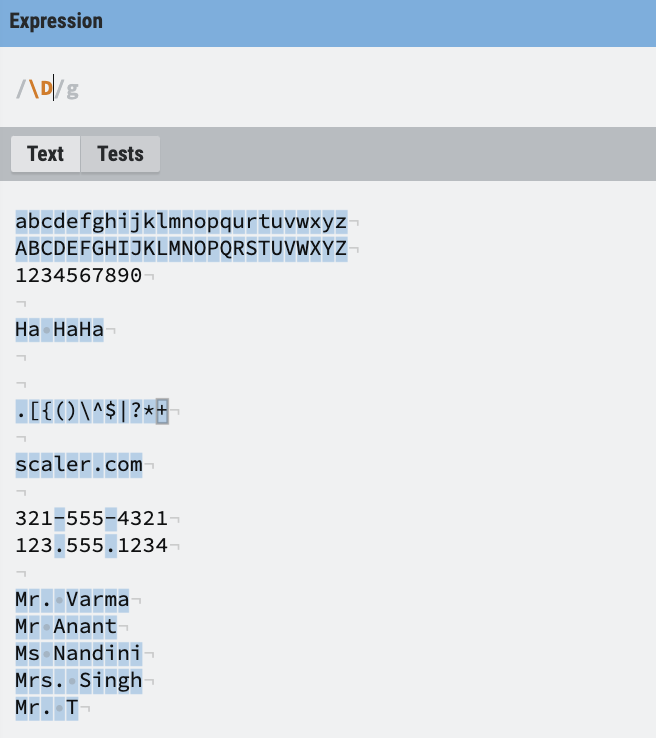

Notice that \D matches for everything which is not a digit except newline

#### Lets try `\w`

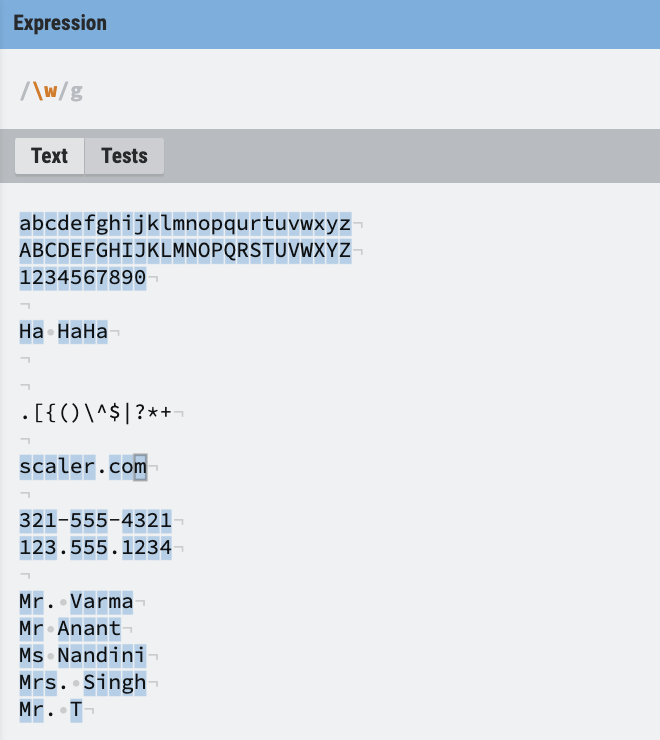

- Hm, looks like, **`\w` looks for alphanumeric characters**
- **`\w` also looks for underscore** (_)


#### What do expect from `\W`?

Non-alphanumeric characters???

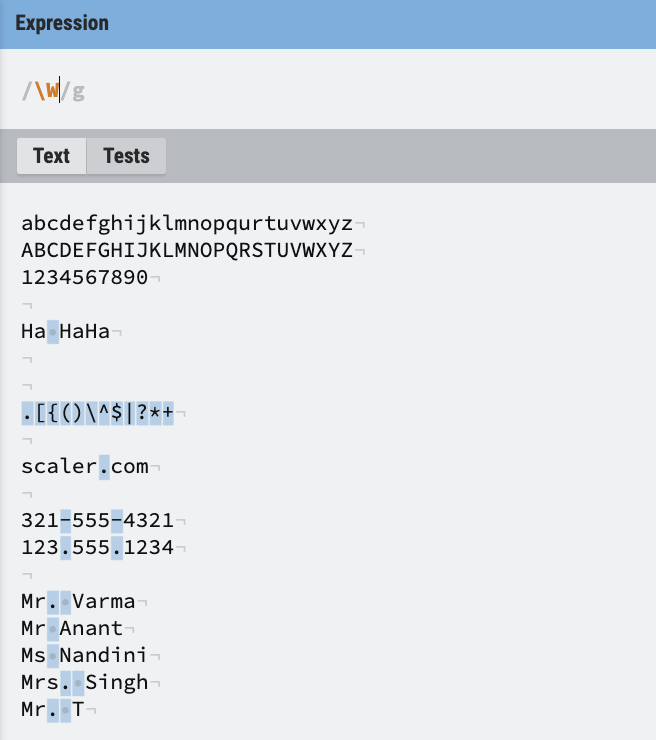

- So, **upper-case counterparts kinda negates the search**
- Notice that none of these meta-characeters matches for newline character.


#### So how do we look for search for things like newline, tab etc?

We have `\s` which looks for space


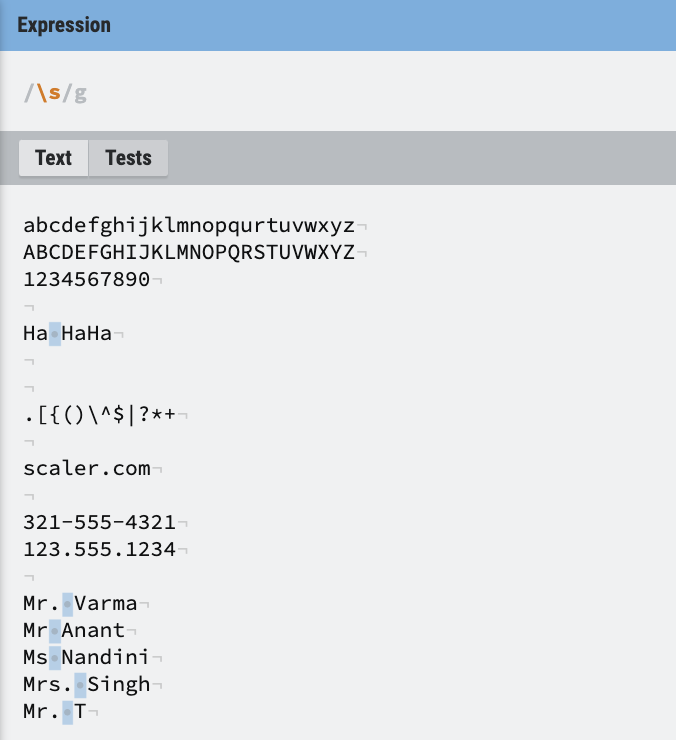

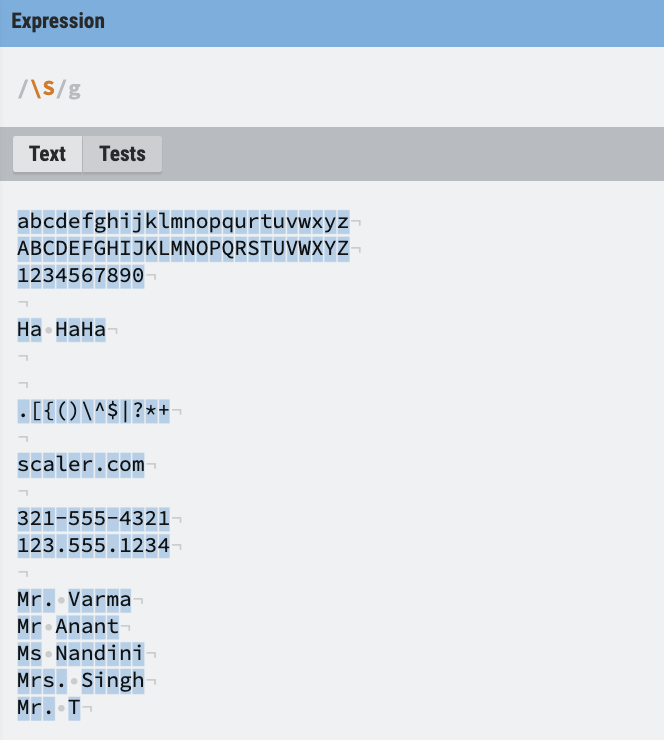

Couple of other special characters are left in our list

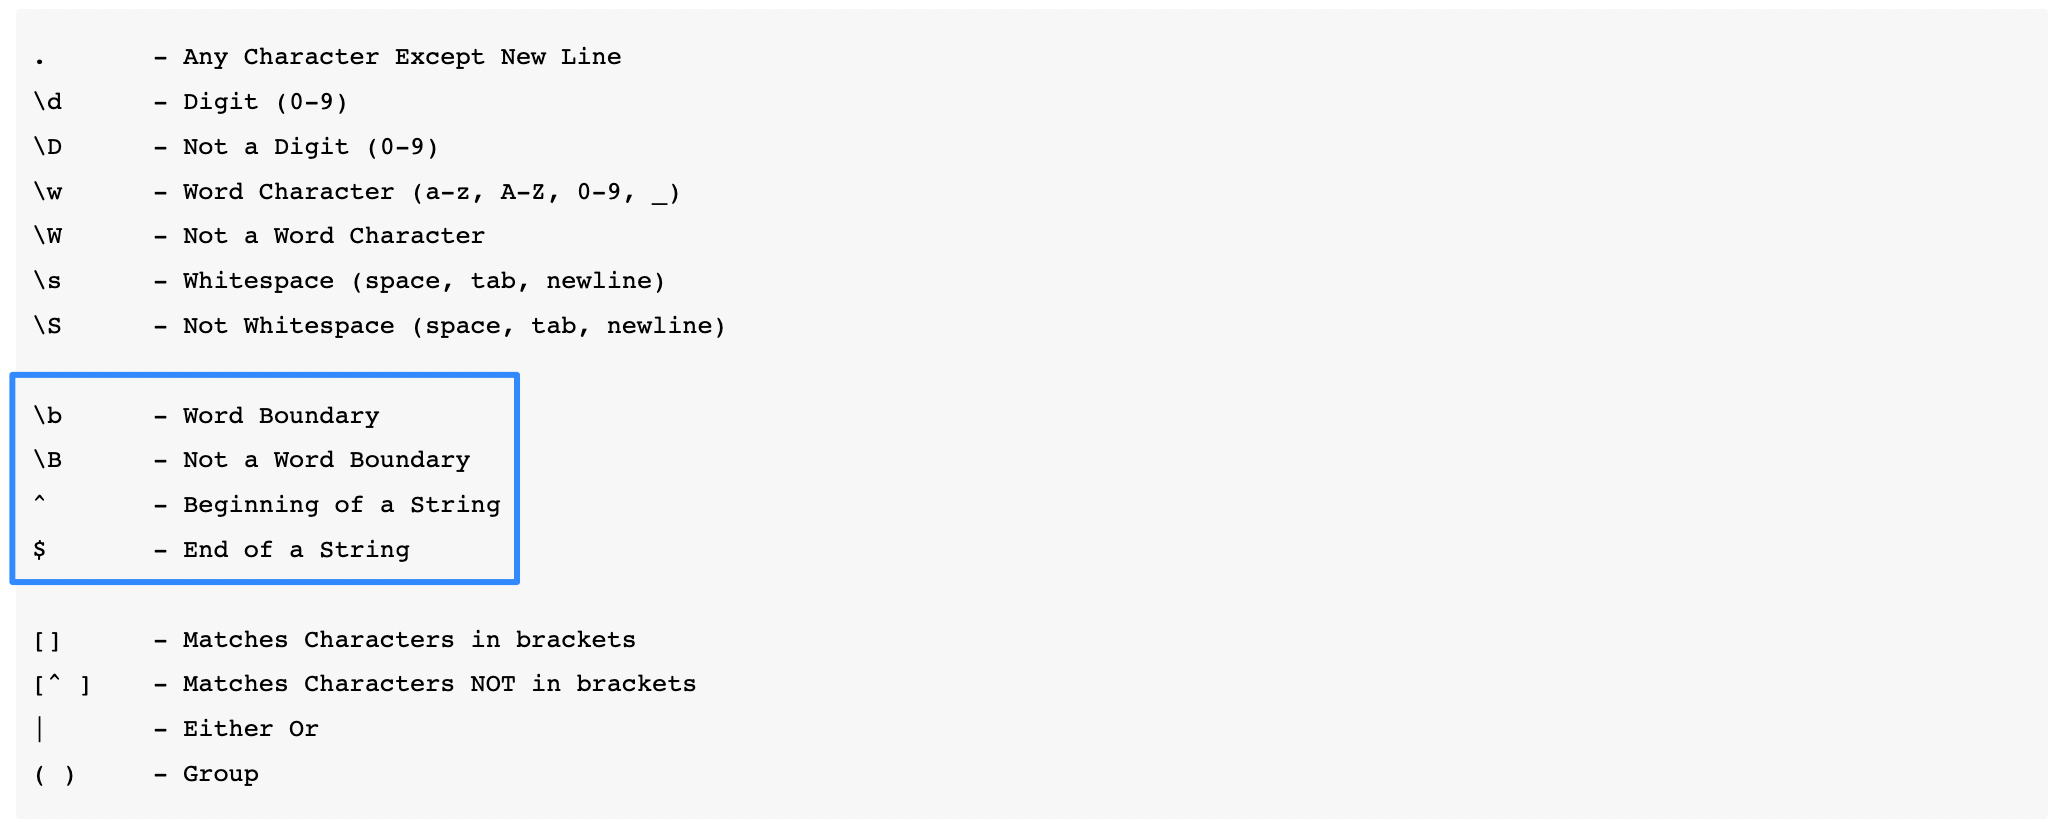

These are not called Metacharacters.

They are called Anchors


### What are Anchors?


- They don't match any characters
- They match invisible positions before or after the characters


#### Lets try `\b`

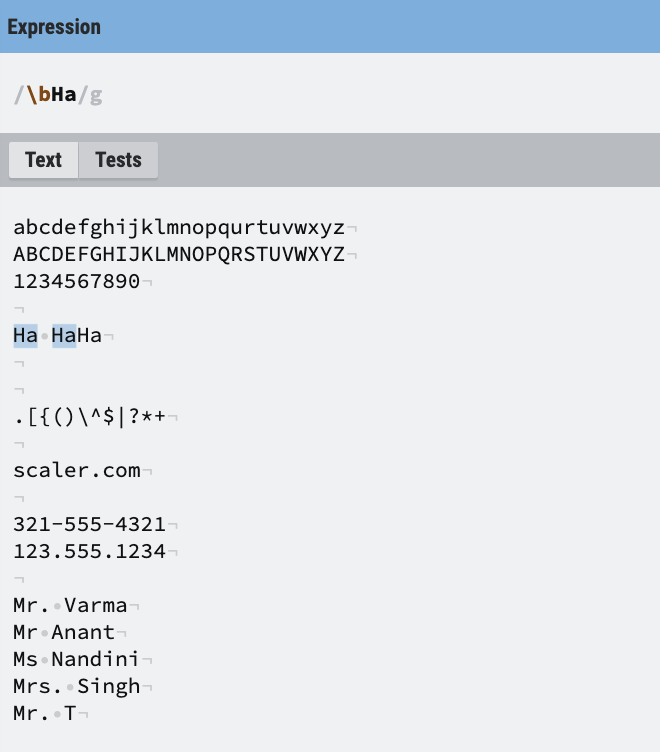

- Notice, if I am checking word boundary with Ha, it only matches with first two Ha
- Both start of the **line and whitespace are considered as word boundaries**

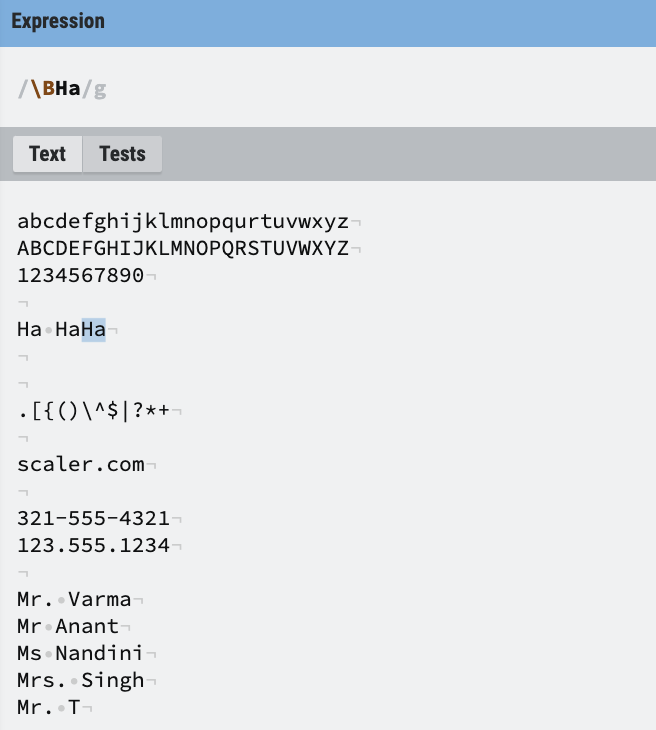

#### Lets see two very important anchors `^` and `$`


`^` matches for a pattern only if its in the begining of the string

`$` matches for a pattern only if its in the end of the string

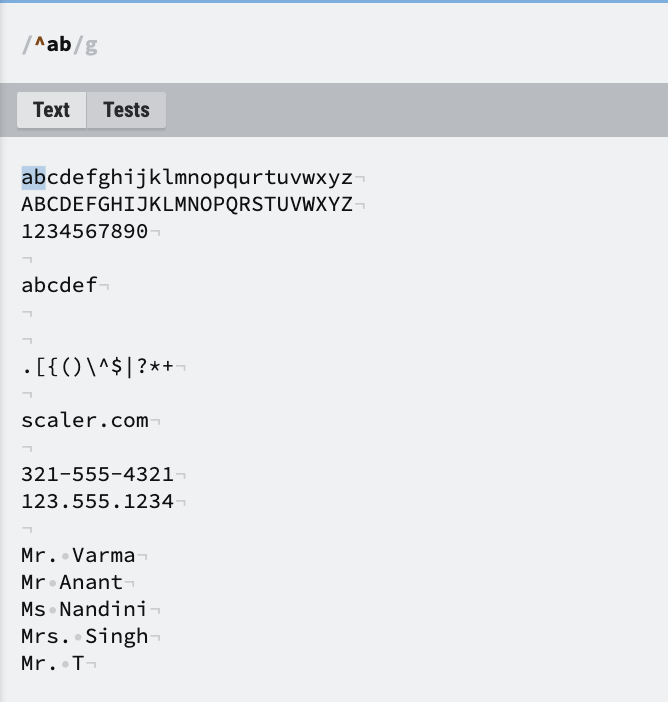

Lets do a quick exerice to understood if we got this

### Exercise - Parse phone numbers in the given text

    abcdefghijklmnopqurtuvwxyz
    ABCDEFGHIJKLMNOPQRSTUVWXYZ
    1234567890

    Ha HaHa

    .[{()\^$|?*+

    scaler.com

    321-555-4321
    123.555.1234

    Mr. Varma
    Mr Anant
    Ms Nandini
    Mrs. Singh
    Mr. T

- **With phone numbers, we cant just type the literal string** as we did before
- We need to use the meta-characters

#### Can we do this using \d?

No, it will parse other numbers also

#### Can we see a pattern in the phone numbers?

3 digits, followed by - or ., then three digits, ...

We can use \d\d\d for three digits?

#### Question: What can use for a dot and dash from the things we have learnt?

May be, we can use ".". Lets try




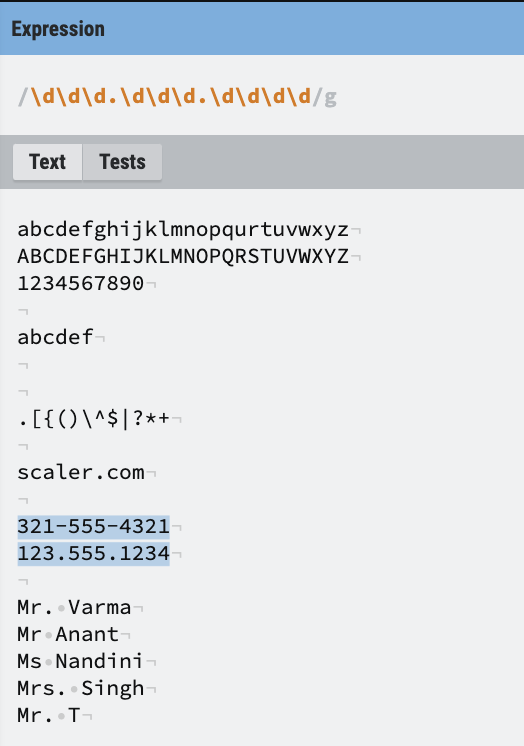

Yay, we have sucessfully been able to extract phone numbers.

But we got lucky, as it will match for any sepearator.

Replace "1234567890" with "123456789012" in text, and notice the changes

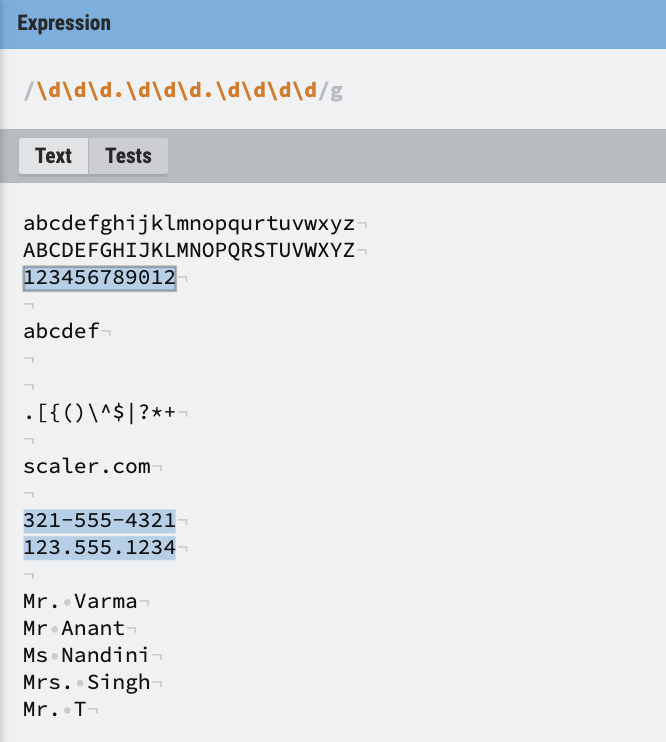

Looks like, we need to be more specific about only allowing dot or dash.


Here, we will have to use something called **Character Set**.


### Character Set

Character Set matches for one of the possible characters defined in the set.

We can make a character set of dot and dash like `[.-]`


#### Question: Don't we need to put \\.?

Inside, [], we don't need to, but no harm




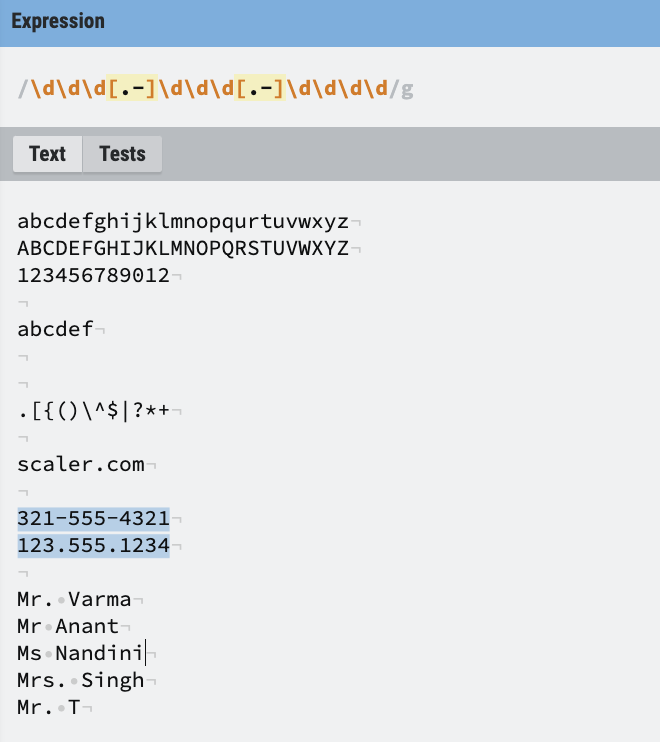

Now, we can see that it only matches the phone numbers.


#### Question: Would it work had there been two consecutive dash/dots?

NO


#### Quiz-1: Write a RE to find phone numbers starting from 8 or 9?

`[89]\d\d[.-]\d\d\d[.-]\d\d\d\d`


Instead of listing all potential characters that you want to match, you can also provide the range


1. `[1-6]` - Looks for digit between 1 and 6
2. `[a-z]` - Looks for any alphabet between a and z


#### What if want to match the chars/numbers except the ones mentioned in the set?

We can use the `^` to negate the set like  `[^a-z]` to match everything which is not a lowercase character

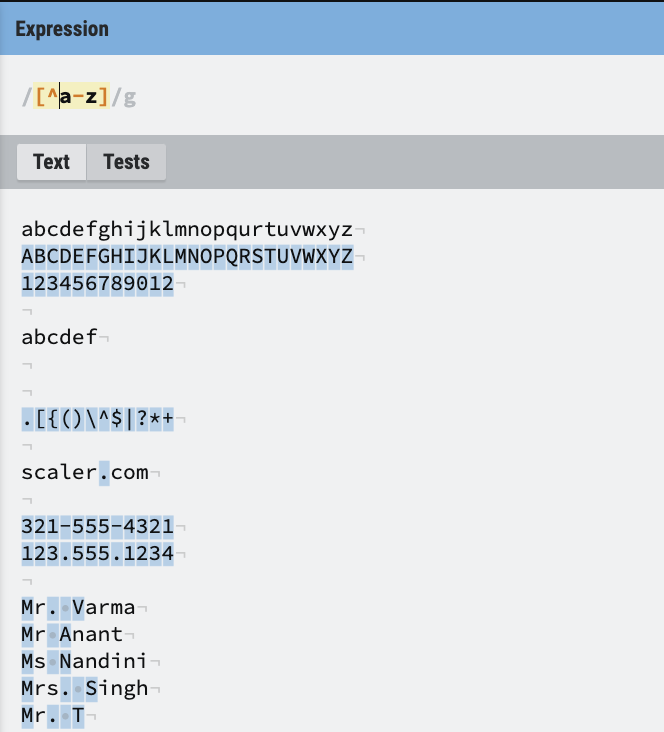

### Quantifiers


- Whatever we have done until now, we have written has involved matching single characters
- But we can match more than one characters at a time


Lets look at the quantifiers available to us

```
*       - 0 or More
+       - 1 or More
?       - 0 or One
{3}     - Exact Number
{3,4}   - Range of Numbers (Minimum, Maximum)
```

#### Lets redo our solution for finding phone numbers


We can put quantifiers like - `\d{3}[.-]\d{3}[-.]\d{4}`



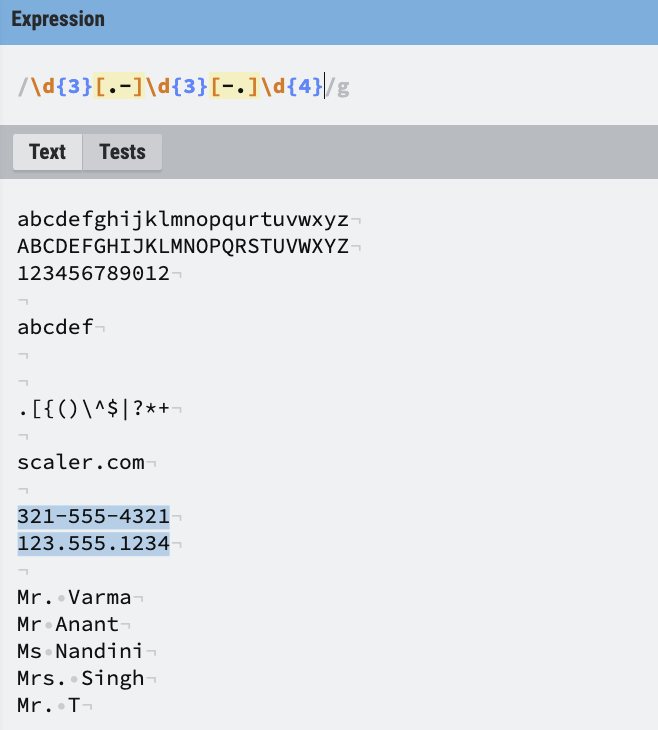

#### Exercise - Lets search for names starting with Mr

- Notice the some have dot and other don't
- Also, we have some names with Mrs also

How will look for it?

`\bMr\.?\s[A-Z][a-z]*`


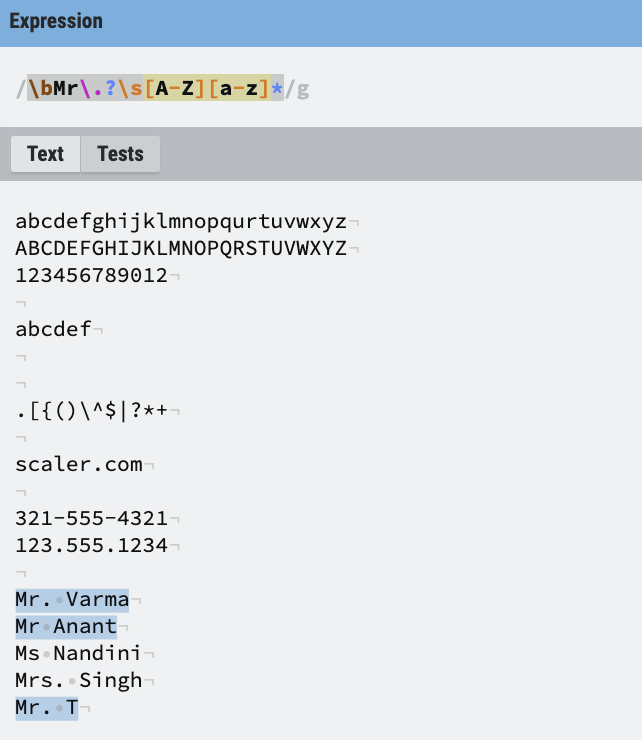

#### Lets now add Ms and Mrs to our search pattern as well


What are possible ways to this?


No, we could look for "r" or "s" at the second with an optional "s" but the solution is not neat


We can instead use something called **Groups** here



### What are Groups?


- Groups allow us to match several different patterns
- We can create groups using paranthesis ()


`M(r|s|rs)\.?\s[A-Z]\w*`

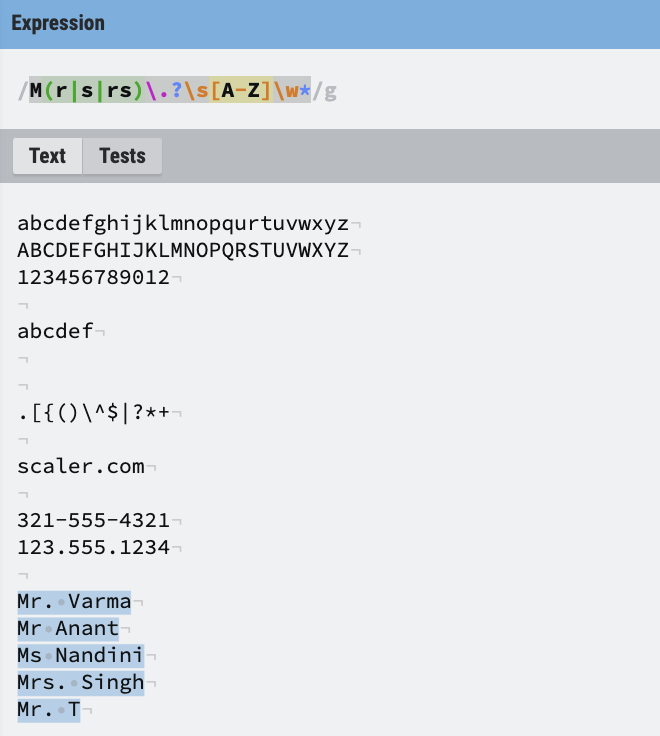

Alright, so we have learnt a lot about the regular expressions


### (Back to) Email Validation RegEX

Lets go back to our old RE for validating email addresss

`^\w+([\.-]?\w+)*@\w+([\.-]?\w+)*(\.\w{2,3})+$`

Explain this logically by breaking it into pieces

1. ^ means start and $ means end, we know this
2. `\w+` means alphanumeric, one or more times
3. Then the group `([\.-]?\w+)*`
4. Within the group, we have `[\.-]?` which means either dot or dash, zero or one time
5. .....
6. Explain `(\.\w{2,3})+` - very important


#### Does this regular expression makes sense now?

Yeah, probably, but this is still not readable. Lets look at a more readable version of the same

In [14]:
regex = '^\w+([\.-]?\w+)*@\w+([\.-]?\w+)*(\.\w{2,3})+$' # highly non-readbale code

#https://docs.python.org/2/library/re.html
regex_verbose = re.compile(r"""           # VERY readable and easy to understand. Software maintanability.
            ^\w+([\.-]?\w+)*              # start, \w+, 
            @                             # single @ sign 
            \w+([\.-]?\w+)*               # Domain name 
            (\.\w{2,3})+$                 # .com, .ac.in,    
             """,re.VERBOSE | re.IGNORECASE)   # no need to worry about these flags for now       

res = regex_verbose.match("abcd@iisc.ac.in"); # no need to worry about the Python functions for now
print(res.string)
print(res)

abcd@iisc.ac.in
<re.Match object; span=(0, 15), match='abcd@iisc.ac.in'>


 We will be using some handy Python function as we work our way to the solution
 
### Important `re` functions
 

 
Lets see some functions which can help in searching a pattern 

 - match : Checks for a match only at the beginning of the string
 - search : Locates the pattern in the string
 - findall : Find all occurence of the string
 - finditer: Return an iterator yielding match objects over all non-overlapping matches




Some couple of function to do string manipulation are 

 - sub : Search and replace of the string
 - split : Split the text by the given regular expression pattern

Before masking, we will have parse the emails and contact numbers

### Let's Extract Phone Numbers

Sample: 234-567-8909

Lets use the RE that we discussed earlier to look for parase phone numbers

Lets try all these functions to understand the difference

In [15]:
pattern = "\d{3}-\d{3}-\d{4}"
print(re.match(pattern, data))

None


Lets try using the search function

In [16]:
pattern = "\d{3}-\d{3}-\d{4}"
print(re.search(pattern, data))

<re.Match object; span=(12, 24), match='615-555-7164'>


This gives the location of the first occurance

Notice, unlike `match()`, it doesn’t restrict us to find matches at the beginning of the string only.

Lets try to find ALL occurences of the pattern using `findall()`

In [17]:
pattern = "\d{3}-\d{3}-\d{4}"
phone_numbers = re.findall(pattern, data)
print(phone_numbers)

['615-555-7164', '800-555-5669', '560-555-5153', '900-555-9340', '714-555-7405', '800-555-6771', '783-555-4799', '516-555-4615', '127-555-1867', '608-555-4938', '568-555-6051', '292-555-1875', '900-555-3205', '614-555-1166', '530-555-2676', '470-555-2750', '800-555-6089', '880-555-8319', '777-555-8378', '998-555-7385', '800-555-7100', '903-555-8277', '196-555-5674', '900-555-5118', '905-555-1630', '203-555-3475', '884-555-8444', '904-555-8559', '889-555-7393', '195-555-2405', '321-555-9053', '133-555-1711', '900-555-5428', '760-555-7147', '391-555-6621', '932-555-7724', '609-555-7908', '800-555-8810', '149-555-7657', '130-555-9709', '143-555-9295', '903-555-9878', '574-555-3194', '496-555-7533', '210-555-3757', '900-555-9598', '866-555-9844', '669-555-7159', '152-555-7417', '893-555-9832', '217-555-7123', '786-555-6544', '780-555-2574', '926-555-8735', '895-555-3539', '874-555-3949', '800-555-2420', '936-555-6340', '372-555-9809', '890-555-5618', '670-555-3005', '509-555-5997', '721-55

Looks like, we have been able to parse all the numbers but we haven't got their locatons

Another handy function is helpful here which gives us the match objects -  `finditer()`

In [18]:
pattern = "\d{3}-\d{3}-\d{4}"
numbers = re.finditer(pattern, data)
for i, num in enumerate(numbers):
  print(num)
  if i == 5: # printing first five
    break

<re.Match object; span=(12, 24), match='615-555-7164'>
<re.Match object; span=(102, 114), match='800-555-5669'>
<re.Match object; span=(191, 203), match='560-555-5153'>
<re.Match object; span=(281, 293), match='900-555-9340'>
<re.Match object; span=(378, 390), match='714-555-7405'>
<re.Match object; span=(467, 479), match='800-555-6771'>


#### How can we extract the location and content from these re.Match objects?

In [19]:
pattern = "\d{3}-\d{3}-\d{4}"
numbers = re.finditer(pattern, data)
for i, num in enumerate(numbers):
  print(num.group(), num.start(), num.end())
  break


615-555-7164 12 24


The "group" function of a regular expression allows you to pick out parts of the matching text.

**Quiz-1** Choose the function whose output can be: <re.Match object; span=(4, 8), match=’aaaa’>.

a) re.search(‘aaaa’, “alohaaaa”)


b) re.match(‘aaaa’, "alohaaaa”)


c) re.match(‘aaa’, “alohaaa”)


d) re.search(‘aaa’, “alohaaa”)

Ans: (a)

The output shown above is that of a search function, whose pattern is ‘aaaa’ and the string is that of 8 characters.

### Similarily, lets extract emails as well


Print the data again to look for pattern in the emails

`(string1)@(string2).(2+characters)`

In [20]:
pattern = r'\w+@\w+\.\w{2,3}'
emails = re.finditer(pattern, data)
for i, email in enumerate(emails):
  print(email)
  if i == 5: # printing first five
    break

<re.Match object; span=(60, 85), match='davemartin@bogusemail.com'>
<re.Match object; span=(147, 175), match='charlesharris@bogusemail.com'>
<re.Match object; span=(235, 263), match='laurawilliams@bogusemail.com'>
<re.Match object; span=(325, 354), match='coreyjefferson@bogusemail.com'>
<re.Match object; span=(425, 453), match='jenniferwhite@bogusemail.com'>
<re.Match object; span=(517, 540), match='tomdavis@bogusemail.com'>


Lets see if our old generic pattern would have worked or not

In [21]:
pattern = '\w+([\.-]?\w+)*@\w+([\.-]?\w+)*(\.\w{2,3})+'
emails = re.finditer(pattern, data)
for i, email in enumerate(emails):
  print(email)
  if i == 5: # printing first five
    break

<re.Match object; span=(60, 85), match='davemartin@bogusemail.com'>
<re.Match object; span=(147, 175), match='charlesharris@bogusemail.com'>
<re.Match object; span=(235, 263), match='laurawilliams@bogusemail.com'>
<re.Match object; span=(325, 354), match='coreyjefferson@bogusemail.com'>
<re.Match object; span=(425, 453), match='jenniferwhite@bogusemail.com'>
<re.Match object; span=(517, 540), match='tomdavis@bogusemail.com'>


Yes, works like a charm. As an addtional activity, lets try to extract names as well

### Extract Names

As we can see here the name follows the pattern:

`String1 String2`

- First alphabet of string 1 starts with upper case followed by lower case alphabets
- Followed by white space character
- First alphabet of string 2 also starts with upper case follwed by lower case alphabets

Now lets try to extract all names from the text. 

In [22]:
pattern = '[A-Z][a-z]*\s[A-Z][a-z]*'

names = re.finditer(pattern,data)
for i, name in enumerate(names):
  print(name)
  if i == 5:
    break

<re.Match object; span=(0, 11), match='Dave Martin'>
<re.Match object; span=(29, 36), match='Main St'>
<re.Match object; span=(39, 52), match='Springfield R'>
<re.Match object; span=(87, 101), match='Charles Harris'>
<re.Match object; span=(119, 126), match='High St'>
<re.Match object; span=(129, 139), match='Atlantis V'>


### Any interesting observation from the result?

- Along with names we are also getting some part of addresses as well eg Maple St ,Oak St etc .

####Why ?

- Because they are also following the pattern string i.e. 1 or more character followed by capital letter

- We can modify our pattern by adding one more [a-z] or using {2,}

In [23]:
pattern = '([A-Z][a-z]+\s[A-Z][a-z]{2,})'

names = re.finditer(pattern,data)
for i, name in enumerate(names):
  print(name)
  if i == 5:
    break

<re.Match object; span=(0, 11), match='Dave Martin'>
<re.Match object; span=(87, 101), match='Charles Harris'>
<re.Match object; span=(177, 190), match='Eric Williams'>
<re.Match object; span=(265, 280), match='Corey Jefferson'>
<re.Match object; span=(356, 371), match='Jennifer Martin'>
<re.Match object; span=(455, 466), match='Erick Davis'>


**Quiz-2** -  Which of the following lines of code will not show a match?


a. re.match(‘ab*’, ‘a’)

b. re.match(‘ab*’, ‘ab’)

c. re.match(‘ab*’, ‘abb’)

d. re.match(‘ab*’, ‘ba’)

Ans: d


**Quiz-3** What is the output of the code shown below?

```
x='[0-9]+'
re.findall(x, '7 apples and 3 mangoes')
```

a. [‘apples’ ‘and’ ‘mangoes’]

b. (7, 4)

c. [‘7’, ‘4’]

d. Error

Ans: c

Now, lets go back to the "clean" syntax we saw earlier and dicussing the missing parts


In [25]:
regex_verbose = re.compile(r"""           # VERY readable and easy to understand. Software maintanability.
            ^\w+([\.-]?\w+)*              # start, \w+, 
            @                             # single @ sign 
            \w+([\.-]?\w+)*               # Domain name 
            (\.\w{2,3})+$                 # .com, .ac.in,    
             """,re.VERBOSE | re.IGNORECASE)

res = regex_verbose.match("abcd@iisc.ac.in")
print(res)

<re.Match object; span=(0, 15), match='abcd@iisc.ac.in'>


Two things that we didn't diccuss earlie were
1. `re.compile()` - just a `re` pattern object, we can use pattern object instead of pattern string if we have to use it again and again 
2. Flags like `re.VERBOSE` and `re.IGNORECASE`

Lets discuss these flags in detail


### Modifying Regular Expression with flags


Lets take two examples

#### `re.I` or `re.IGNORECASE`

Makes matching case insensitive
   

In [26]:
print(re.search('a+', 'aaaAAA'))
print(re.search('A+', 'aaaAAA'))

<re.Match object; span=(0, 3), match='aaa'>
<re.Match object; span=(3, 6), match='AAA'>


Lets try do the same pattern matching while ignoring case

In [27]:
print(re.search('a+', 'aaaAAA', re.I))
print(re.search('A+', 'aaaAAA', re.IGNORECASE))

<re.Match object; span=(0, 6), match='aaaAAA'>
<re.Match object; span=(0, 6), match='aaaAAA'>


#### `re.X` or `re.VERBOSE`


The verbose flag allows to add

- Better spacing, indentation, and a clean format for writing intricate patterns.
- Allows us to add comments right inside the pattern for later reference using the hash sign (#).


Remember the clearer verbose RE we wrote for email search?

#### You can use multiple flags together 

Simply add them together using '|'

In [28]:
target_str = "Priya is an Instructor at Scaler and her salary is 100000"

result = re.search(r"""(^\w{2,}) # match 2+ word at the start
                        .+(\d{6}$) # match 6-digit number at the end """, 
                   target_str, re.X | re.I)


print(result)
print(result.group())

<re.Match object; span=(0, 57), match='Priya is an Instructor at Scaler and her salary i>
Priya is an Instructor at Scaler and her salary is 100000


#### But why this method which extracts the matched text is called `group()`?

Notice we have defined two groups in the text


1. `(.*)`
2. `(.*?)`

We can extract them seperately by passing index in the `group()`

In [29]:
result.group(1)

'Priya'

In [30]:
result.group(2)

'100000'

Lets see what happens when I put 0

In [31]:
result.group(0)

'Priya is an Instructor at Scaler and her salary is 100000'

#### Can we extract different parts of the email using the same technique?

In [32]:
pattern = r'(\w+)@(\w+)\.(\w{2,3})'
emails = re.finditer(pattern, data)
for i, email in enumerate(emails):
  print(email.group(), email.group(1), email.group(2), email.group(3))
  if i == 5: # printing first five
    break

davemartin@bogusemail.com davemartin bogusemail com
charlesharris@bogusemail.com charlesharris bogusemail com
laurawilliams@bogusemail.com laurawilliams bogusemail com
coreyjefferson@bogusemail.com coreyjefferson bogusemail com
jenniferwhite@bogusemail.com jenniferwhite bogusemail com
tomdavis@bogusemail.com tomdavis bogusemail com


#### Lets try to extract pincode from the data as well

In [33]:
print(data[:200])

Dave Martin
615-555-7164
173 Main St., Springfield RI 55924
davemartin@bogusemail.com

Charles Harris
800-555-5669
969 High St., Atlantis VA 34075
charlesharris@bogusemail.com

Eric Williams
560-555-5


If you follow the location pattern in the data eg. ` Atlantis VA 34075`, you observe that-
- First letter is upper case followed by some alphabets
- whitepace character
- Two capital letters for codes
- whitespace character
- pincode

In [34]:
regex = '[A-Z][a-z]+\s[A-Z]+\s\d+'
matches = re.findall(regex,data)
print(matches)

['Springfield RI 55924', 'Atlantis VA 34075', 'Faketown AK 86847', 'Epicburg NE 10671', 'Sunnydale CT 74983', 'Olympus TN 32425', 'Dawnstar IL 61914', 'Pythonville LA 29947', 'Quahog OR 90938', 'Winterfell VA 99000', 'Lakeview NY 87282', 'Smalltown WY 28362', 'Westworld TX 61967', 'Balmora MT 56526', 'Valyria KY 97152', 'Mordor IL 72160', 'Blackwater NH 97183', 'Bedrock IA 58176', 'Mordor TX 89212', 'Smalltown SC 96962', 'Smalltown ND 77737', 'Bedrock GA 34615', 'Balmora OR 30826', 'Quahog MS 29348', 'Valyria KY 94854', 'Olympus NV 21888', 'Lakeview MD 59348', 'Mordor FL 74122', 'Winterfell NV 99431', 'Metropolis ID 16576', 'Metropolis ME 29540', 'Pythonville OH 78172', 'Blackwater NC 79714', 'Atlantis MS 87195', 'Atlantis ND 85386', 'City TX 57112', 'Eerie SD 17880', 'Gotham PA 46692', 'City AR 78455', 'Bedrock NE 11899', 'Smalltown TN 43281', 'Valyria NC 78036', 'Valyria AK 62260', 'Park KS 66724', 'Smalltown AZ 18586', 'Springfield IA 16272', 'Gotham KY 89569', 'Landing GA 54999', '

#### Lets finish our business use-case by masking email and phone number

In [35]:
def mask_email(s):
    if '@' in s: 
        name, domain = s.split('@')
        return f"{name[0]}#####{name[-1]}@{domain}"


pattern = '\w+@\w+.[a-z]{3}'
emails = re.findall(pattern,data)
print(emails)

['davemartin@bogusemail.com', 'charlesharris@bogusemail.com', 'laurawilliams@bogusemail.com', 'coreyjefferson@bogusemail.com', 'jenniferwhite@bogusemail.com', 'tomdavis@bogusemail.com', 'neilpatterson@bogusemail.com', 'laurajefferson@bogusemail.com', 'mariajohnson@bogusemail.com', 'michaelarnold@bogusemail.com', 'michaelsmith@bogusemail.com', 'robertstuart@bogusemail.com', 'lauramartin@bogusemail.com', 'barbaramartin@bogusemail.com', 'lindajackson@bogusemail.com', 'stevemiller@bogusemail.com', 'davearnold@bogusemail.com', 'jenniferjacobs@bogusemail.com', 'neilwilson@bogusemail.com', 'kurtjackson@bogusemail.com', 'maryjacobs@bogusemail.com', 'michaelwhite@bogusemail.com', 'jenniferjenkins@bogusemail.com', 'samwright@bogusemail.com', 'johndavis@bogusemail.com', 'neildavis@bogusemail.com', 'laurajackson@bogusemail.com', 'johnwilliams@bogusemail.com', 'michaelmartin@bogusemail.com', 'maggiebrown@bogusemail.com', 'kurtwilson@bogusemail.com', 'elizabetharnold@bogusemail.com', 'janemartin@bog

Just like emails, now we will see how you can use the similar logic for contact no.

In [36]:
pattern = "\d{3}-\d{3}-\d{4}"
nums = re.findall(pattern,data)
print(nums)

['615-555-7164', '800-555-5669', '560-555-5153', '900-555-9340', '714-555-7405', '800-555-6771', '783-555-4799', '516-555-4615', '127-555-1867', '608-555-4938', '568-555-6051', '292-555-1875', '900-555-3205', '614-555-1166', '530-555-2676', '470-555-2750', '800-555-6089', '880-555-8319', '777-555-8378', '998-555-7385', '800-555-7100', '903-555-8277', '196-555-5674', '900-555-5118', '905-555-1630', '203-555-3475', '884-555-8444', '904-555-8559', '889-555-7393', '195-555-2405', '321-555-9053', '133-555-1711', '900-555-5428', '760-555-7147', '391-555-6621', '932-555-7724', '609-555-7908', '800-555-8810', '149-555-7657', '130-555-9709', '143-555-9295', '903-555-9878', '574-555-3194', '496-555-7533', '210-555-3757', '900-555-9598', '866-555-9844', '669-555-7159', '152-555-7417', '893-555-9832', '217-555-7123', '786-555-6544', '780-555-2574', '926-555-8735', '895-555-3539', '874-555-3949', '800-555-2420', '936-555-6340', '372-555-9809', '890-555-5618', '670-555-3005', '509-555-5997', '721-55

Now, we can mask them by using basic string manipulation

In [37]:
def mask_phone(p):
  if len(p) == 12:
    return f"###-###-{p[-3:]}"

In [38]:
print([mask_phone(num) for num in nums])

['###-###-164', '###-###-669', '###-###-153', '###-###-340', '###-###-405', '###-###-771', '###-###-799', '###-###-615', '###-###-867', '###-###-938', '###-###-051', '###-###-875', '###-###-205', '###-###-166', '###-###-676', '###-###-750', '###-###-089', '###-###-319', '###-###-378', '###-###-385', '###-###-100', '###-###-277', '###-###-674', '###-###-118', '###-###-630', '###-###-475', '###-###-444', '###-###-559', '###-###-393', '###-###-405', '###-###-053', '###-###-711', '###-###-428', '###-###-147', '###-###-621', '###-###-724', '###-###-908', '###-###-810', '###-###-657', '###-###-709', '###-###-295', '###-###-878', '###-###-194', '###-###-533', '###-###-757', '###-###-598', '###-###-844', '###-###-159', '###-###-417', '###-###-832', '###-###-123', '###-###-544', '###-###-574', '###-###-735', '###-###-539', '###-###-949', '###-###-420', '###-###-340', '###-###-809', '###-###-618', '###-###-005', '###-###-997', '###-###-632', '###-###-567', '###-###-830', '###-###-426', '###-###-

### Business-case 2: Extract data from a PDF invoice

Till now we have seen how to extract data from text file

#### What if you want to extract data from pdf ?

Lets say you have the pdf of typical invoice of the company.

(click on the Url to check how it looks)

- Given a PDF https://slicedinvoices.com/pdf/wordpress-pdf-invoice-plugin-sample.pdf,
- we will see how to extract predefined key fields from this PDF
 - Assume the format is fixed.

 Dowload the pdf :

link : https://drive.google.com/file/d/1etozIXX1Wly8bIFgs4bsJbREcW4jpeG0/view?usp=sharing

In [39]:
!wget "https://drive.google.com/uc?export=download&id=1etozIXX1Wly8bIFgs4bsJbREcW4jpeG0" -O invoice.pdf

zsh:1: command not found: wget


In [40]:
!pip3 install pyPDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 429.6 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyPDF4: filename=PyPDF4-1.27.0-py3-none-any.whl size=61248 sha256=81f1e6fbf92ff653ee43cae43de44cfe257296bf2fc09115b820f44c2dea7565
  Stored in directory: /Users/dhruv/Library/Caches/pip/wheels/cd/0e/4a/e6f842a6035ccffff0dab29c39dd06c3427560a82783355a83
Successfully built pyPDF4


In [41]:
import PyPDF4

with open('invoice.pdf', mode='rb') as f:
    reader = PyPDF4.PdfFileReader(f) # ask them to understand later
    page = reader.getPage(0)
    txt = page.extractText()
    print(txt)

FileNotFoundError: [Errno 2] No such file or directory: 'invoice.pdf'

#### Lets try to extract the invoice number

In [ ]:
m = re.search("INV-[0-9]*", txt)
print(m)

#### Similarly, lets try to extract amounts

In [ ]:
m = re.search("$[0-9]*\.[0-9]*", txt)
print(m)

#### Question: Why nothing is printed? Any problem with the RE? `$[0-9]*\.[0-9]*`?

Notice the usage of `$` - remember that $ is an anchor

#### How do we search for "$"?

Add backslash in front

In [ ]:
m = re.findall("\$[0-9]*\.[0-9]*", txt)
print(m)

#### Most imporatant amount is Total Due, lets try to extract that

In [ ]:
m = re.findall("Total Due\$[0-9]*\.[0-9]*", txt)
print(m)

Whats the error now in above regex?



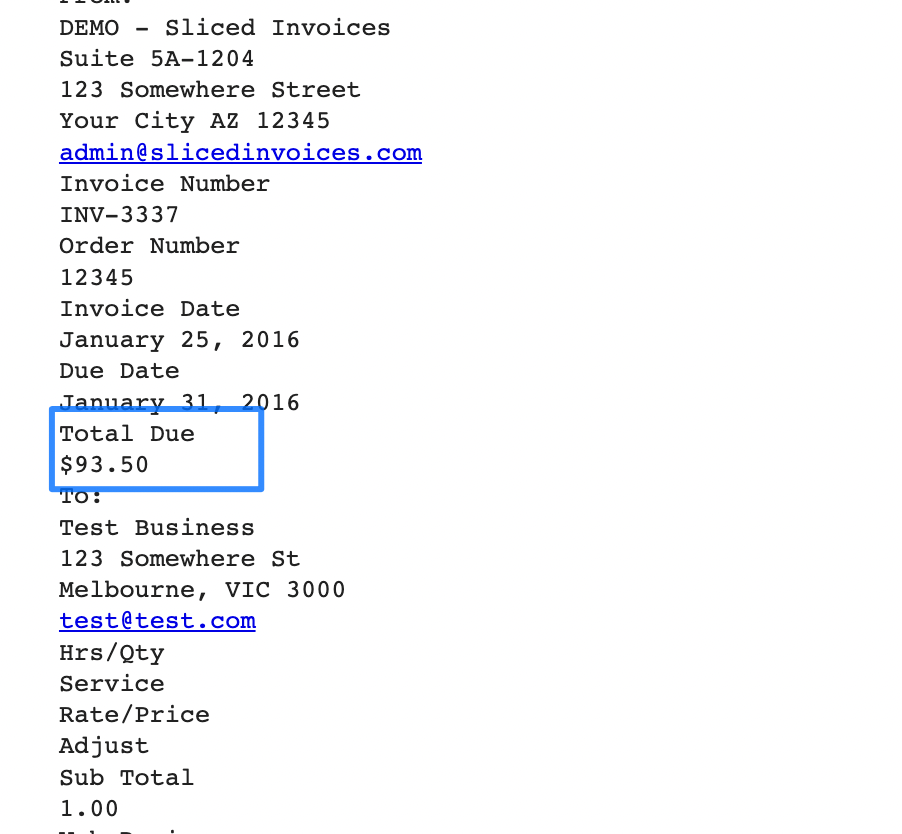

- Because of new line character after total due in data

In [ ]:
m = re.findall("Total Due\n\$[0-9]*\.[0-9]*", txt)
print(m)

### Apply RegEx on pandas dataframe

Till now we have seen how to apply regex to extract info on text file.

Now we are going to see how to use it on pandas df

For that ,lets first create a dataframe, which contains 3 columns, “Name” ,“Email” and "Birthday". 



In [ ]:
import pandas as pd

df = pd.DataFrame({'Name': ['Amy', 'Ben', 'Christine', 'David'],
                    'Email': ['amy.l@hotmail.com',
                              'benmartni@gmail.fr',
                              'c.mousse@example.com',
                              'd_zhang@fp.fr'],
                   'Birthday':['12/02/1992',
                               '01/12/1980',
                               '12/05/1839',
                               '05/11/1990']},
                              columns=['Name', 'Email','Birthday'])


In [ ]:
df

### Lets use RegEx to "replace" character in dataframe - `sub()`

We will also another handy function `re` library called `sub()` to substitute

As you can see e-mail addresses contain “@” to specify the second-level or string2.

####Lets say we want to replace it to “[at]” in the dataframe. 

In [ ]:
import re
df['Email'].apply(lambda x: re.sub(r'@', '[at]', x))

### Lets use RegEx to modify values in some other columns

Currently we have birthday represented in the format DD/MM/YYYY

#### What if you want to change Birthday in DD-MM-YYYY format ?

- We can firstly use re.match() and Match.groups() to separate it into multiple groups, then put them in order.



In [ ]:
def date_convert(date_value):
    m = re.match(r'(\d{2})\/(\d{2})\/(\d{4})', date_value)
    return '-'.join([m.groups()[2], m.groups()[1], m.groups()[0]])

Lets call this function using `apply()` function

In [ ]:
df['Birthday']=df['Birthday'].apply(lambda x:date_convert(x))
df

### Strong Password Detector 

####Write a RegEx function to check the password given to the function is stron

A strong password is defined as follows:

- At least eight characters long
- Contains one uppercase character
- Contains one lowercase character
- Has at least one digit
- Has at least one special character

####Solution:

At first glance, this problem looks a lot harder than the previous one.

In actuality, it’s just as simple (just longer).

In [ ]:
#Here is what the skeleton of the solution looks like:

def validate_password(password):
    """ check for 
    - at least eight characters long
    - contains uppercase character 
    - contains lowercase character
    - has at least one digit
        - has at least one special character
    Args:
        password (str): password as string
    Returns:
        (bool): True if password is strong, else False
    """

In [ ]:
def validate_password(password):
    # REGEX PATTERN THAT CHECKS PASSWORD HAS AT LEAST 8 CHARACTERS
    at_least_8 = r".{8,}"
    # REGEX PATTERN THAT CHECKS PASSWORD HAS 1 LOWERCASE
    one_lowercase = r"[a-z]"
    # REGEX PATTERN THAT CHECKS PASSWORD HAS 1 UPPERCASE
    one_uppercase = r"[A-Z]"
    # REGEX PATTERN THAT CHECKS PASSWORD HAS 1 DIGIT
    one_digit = r"\d"
    # REGEX PATTERN THAT CHECKS PASSWORD HAS 1 SPECIAL CHARACTER
    special_characters = r"[!\”#$%&'()*+,-./:;<=>?@[\]^_`{|}~]"
 
    if re.search(at_least_8, password) == None:
        print('Error: Password must have at least 8 characters')
        return False
    elif re.search(one_lowercase, password) == None:
        print('Error: Password must have at least 1 lowercase character')
        return False
    elif re.search(one_uppercase, password) == None:
        print('Error: Password must have at least 1 uppercase character')
        return False
    elif re.search(one_digit, password) == None:
        print('Error: Password must have at least 1 digit')
        return False
    elif re.search(special_characters, password) == None:
        print('Error: Password must have at least 1 special character')
        return False
 
    return True
 
if __name__ == '__main__':
    print(validate_password('pass'))
    print(validate_password('PASSWORD'))
    print(validate_password('password'))
    print(validate_password('Password'))
    print(validate_password('Password1234'))
    print(validate_password('Password-1234'))

Here, we have been able to succesfully masked both emails and mobile numbers.
